<a href="https://colab.research.google.com/github/Mikhail-Klochkov/train_/blob/master/projector_Zupyk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import scipy
import numpy.linalg 
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv
import random
import PIL

((208, 370, 3), (370, 620))

In [ ]:
def transpose_custom(array):
    if array.shape.__len__() == 3 and any(np.array(array.shape) == 3):
        shape = np.array(array.shape)
        ind = int(np.where(shape == 3)[0])
        mask = np.arange(3)
        mask = list(mask[mask != ind]) + [ind, ]
        array = array.transpose(tuple(mask))
        return array
    else:
        raise ValueError('shape is not equal 3')


def rgbtogray(rgb_image):
    # проверка на наличие 3 размерности, отвечающей за цвет
    assert(any(np.array(rgb_image.shape) == 3))
    # форма матрицы должна удовлетворять шаблону (height, width, 3)
    if(rgb_image.shape[2] != 3): # необходимо транспонировать
        rgb_image = transpose_custom(rgb_image)
        assert(rgb_image.shape[2] == 3)
    r, g, b = rgb_image[:,:,0], rgb_image[:, :, 1], rgb_image[:,:,2]
    return 0.2989 * r + 0.5870 * g + 0.1140 * b
    

def download_image(filename):
    # мы получаем  матрицу 3-ех мерную, либо сразу grayscale 
    # если изображение представленно в rgb мы его переводим в grayscale
    if(os.path.isfile(filename)):
        img = mpimg.imread(filename)
        if (len(img.shape) == 3):
            img = rgbtogray(img)
        return np.array(img, dtype = np.uint8)

    

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving msu_2.jpg to msu_2.jpg
User uploaded file "msu_2.jpg" with length 411659 bytes


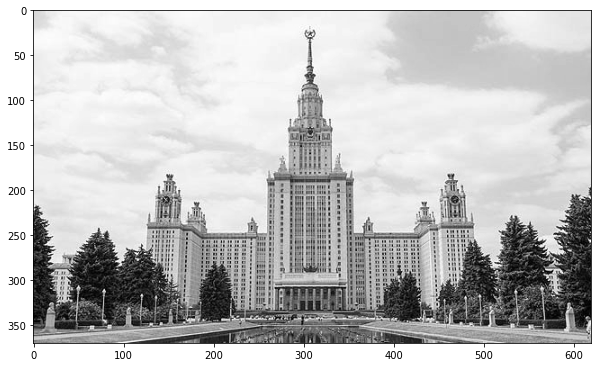

In [ ]:
filename = "msu_1.jpg"
image = download_image(filename)
plt.figure(figsize = (10, 13))
plt.imshow(image, cmap = 'gray')

In [ ]:
img = cv.imread(cv.samples.findFile(filename), cv.IMREAD_ANYCOLOR)
img.shape

(370, 620, 3)

thres is generate
plot thres


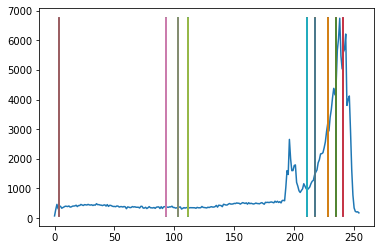

In [ ]:
a = np.arange(20).reshape((4, 5))

def 

def generate_c(unique, counts, N = 10):
  p = counts / counts.sum()
  min_ = unique.min()
  max_ = unique.max()
  flag = True
  while(flag):
    rand = np.random.choice(unique, p = p, size = N - 1)
    diff = np.array(sorted(rand)[1:] + [unique.max()]) - np.array(sorted(rand))
    if (len(rand) == N-1 and all(diff > 5)):
      rand.sort()
      return rand

def masks(image, c_left, c_right):
  if c_left is None and c_right is not None:
    return (image > c_right).astype(bool)
  elif c_right is None and c_left is not None:
    return (image < c_left).astype(bool)
  elif c_right is None and c_left is None: # Нет ограничений
    return np.full(shape = (image.shape[0], image.shape[1]), fill_value = True, dtype = bool)
  
  return np.bitwise_and((image > c_left), (image < c_right))

def construct_form(image, N, strategy = 'distribution'): # Нет смысла разбивать больше, чем на 255 так как уже различия в пикселях нет
  # N - это число кусочно-постоянных областей изображения
  # Нам необходимо выбрать N-1 чисел, вообще говоря есть разные стратегии, выбора мозаичного разбиения
  # Можно пробовать генерить из Uniform распределения, или задавать согласно некоторому
  # критерию, чтобы разбиение на области происходило относительно по равным отрезкам 
  # возвращает набор xi шаблонов областей
  assert(N < 250 and N >= 0)
  if N == 0:
    # Форма изображения будет состоять из всей области видимости
    return list(masks(image, c_left= None, c_right=None))
  max_brightness = image.max()
  min_brightness = image.min() 
  xi_arrays = []
  if (strategy == 'const'): # Одинаковые интервалы
    range_b = np.abs(max_brightness - min_brightness) // N
    for i in range(1, N, 1):
      if (i != 1 and i != N-1):
        xi_arrays.append(masks(image, c_left = range_b * i, c_right = range_b * (i + 1)))
      else:
        xi_arrays.append(masks(image, c_left = range_b if i == 1 else None, 
                             c_right = max_brightness - range_b if i == N - 1 else None))
    return xi_arrays
  elif (strategy == 'distribution'):
    # Будем стараться выбирать разбиение в области, где плотнее всего универсальных значений яркости
    # Возле среднего
    unique, counts = np.unique(image, return_counts = True)
    plt.plot(unique, counts)
    thres = generate_c(unique, counts, N = N)
    print('thres is generate')
    for i in range(len(tresh)):
      plt.plot([thres] * 100, np.linspace(counts.min(), counts.max(), 100))
    print('plot thres')
    for i in range(1, N-1, 1):
      if (i != 1 and i != N-2):
        xi_arrays.append(masks(image, c_left = thres[i], c_right = thres[i + 1]))
      else:
        xi_arrays.append(masks(image, c_left = thres[0] if i == 1 else None, 
                             c_right = thres[1] if i == N - 2 else None))
    return xi_arrays

xi_arrays = construct_form(image, N = 10)

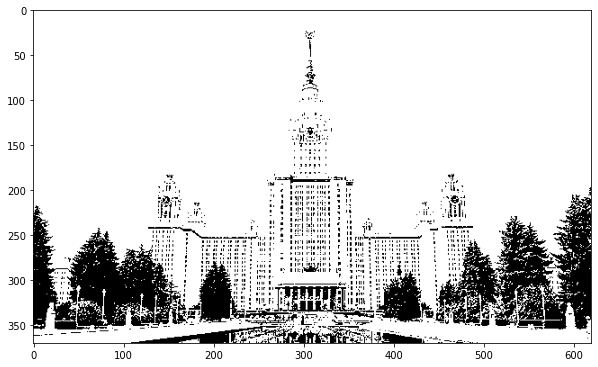

In [ ]:
def first_approx_mozaic(image, xi_arrays):
  assert(isinstance(xi_arrays, list))
  new_image = np.zeros_like(image, dtype = np.uint8)
  for i in range(len(xi_arrays)):
    mask = xi_arrays[i]
    row, col = np.where(mask)
    new_image[row, col] = int(image[row, col].mean())
  return new_image


plt.figure(figsize = (10, 13))
plt.imshow(first_approx_mozaic(image, xi_arrays), cmap = 'gray')

file read


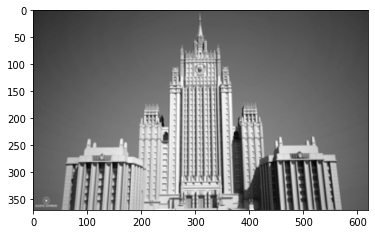

In [ ]:
def scalar_multiply(img1, img2):
  assert(img1.shape == img2.shape)
  return (img1 * img2).sum()

def projector(image_g, xi_arrays):
  N = len(xi_arrays)
  coefficients = [scalar_multiply(image_g, img_xi) / (scalar_multiply(img_xi, img_xi)) for img_xi in xi_arrays]
  image_projection = np.zeros_like(xi_arrays[0]) 
  for i in range(len(xi_arrays)):
    mask = xi_arrays[i]
    row, col = np.where(mask)
    image_projection[row, col] = coefficients[i]
  return image_projection

filename2 = 'msu_2.jpg'
if (os.path.isfile(filename2)):
  print('file read')
  im = PIL.Image.open(filename2)
  im.thumbnail((image.shape[0], image.shape[1]))
  im = np.array(im)
else:
  print('file2 not found')

im_resize_cv = cv.resize(im, (image.shape[1], image.shape[0]), interpolation = cv.INTER_AREA)
im2_gray = np.array(rgbtogray(im_resize_cv), dtype = np.uint8)
plt.imshow(im2_gray, cmap = 'gray')

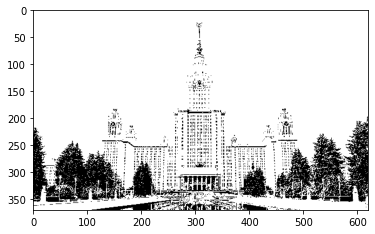

In [ ]:
projection_im2_on_im1 = projector(im2_gray, xi_arrays)
plt.imshow(projection_im2_on_im1, cmap = 'gray')

In [ ]:
a = np.arange(25).reshape((5,5))
mask = np.full(shape = (5, 5), fill_value = True, dtype = bool)
row_index = np.where(mask)
#a[]
row_index
mask = masks(a, c_left=10, c_right= 20)
row, col = np.where(mask)
int(a[row, col].mean())
int(5.999)

5

In [ ]:
min_ = 13
max_ = 189
list_ = []
n = 7
range_b = (max_ - min_) // n
list_.append((range_b, None))
for i in range(1, n-1, 1):
  list_.append((range_b * i, range_b * ( i + 1)))
list_.append((None, max_ - range_b))

list_, range_b, max_ - min_

([(25, None),
  (25, 50),
  (50, 75),
  (75, 100),
  (100, 125),
  (125, 150),
  (None, 164)],
 25,
 176)

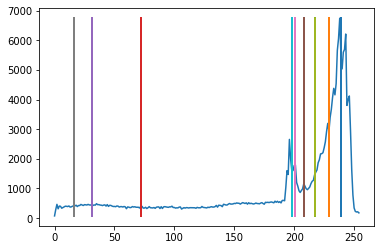

In [ ]:
from scipy import stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
unique, counts = np.unique(image, return_counts=True)
plt.plot(unique, counts)
#(mu, sigma) = stats.norm(list(range(10)))
?stats.norm
unique[counts.argmax()]
p = counts / counts.sum()
rand = np.random.choice(unique, p = p, size = 10)
for i in range(10):
  plt.plot([rand] * 100, np.linspace(counts.min(), counts.max(), 100))

In [ ]:
np.percentile(sorted(counts, reverse = True)[::-1], 1.2)

211.624

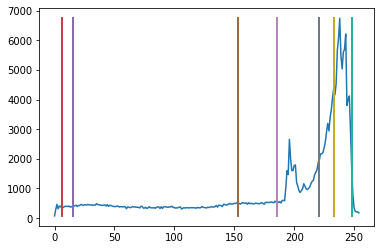

In [ ]:
tresh = generate_c(unique, counts, N = 7)
plt.plot(unique, counts)
for i in range(len(tresh)):
  plt.plot([tresh] * 100, np.linspace(counts.min(), counts.max(), 100))

In [ ]:

np.array(rand_sort[1:] + [unique.max()]) - np.array(sorted(rand))

array([ 3, 35, 19, 49, 10, 12, 17, 23,  4, 10], dtype=uint8)